In [2]:
import numpy as np

In [3]:
xs = np.loadtxt("old_faithful.txt")
xs.shape

(272, 2)

In [4]:
import matplotlib.pyplot as plt

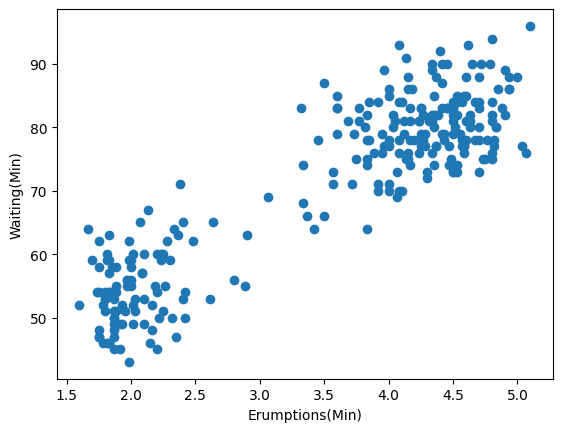

In [5]:
plt.scatter(xs[:, 0], xs[:, 1])
plt.xlabel("Erumptions(Min)")
plt.ylabel("Waiting(Min)")
plt.show()

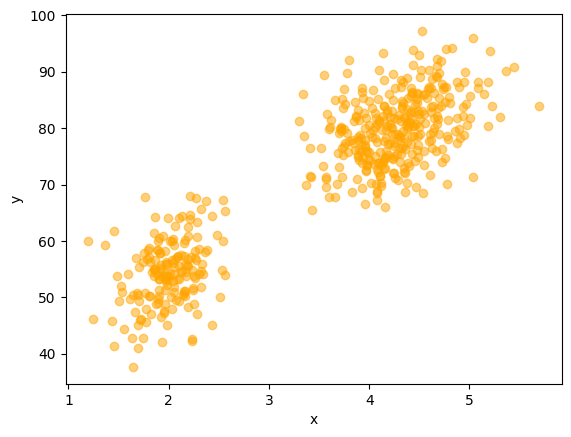

In [6]:
mus = np.array([[2.0, 54.50],
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44],
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.00 ]]])
phis = np.array([0.35, 0.65])

def sample():
	z = np.random.choice(2, p=phis)
	return np.random.multivariate_normal(mus[z], covs[z])

N = 500
xs = np.zeros((N, 2))
for i in range(N):
	xs[i] = sample()

plt.scatter(xs[:, 0], xs[:, 1], color="orange", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

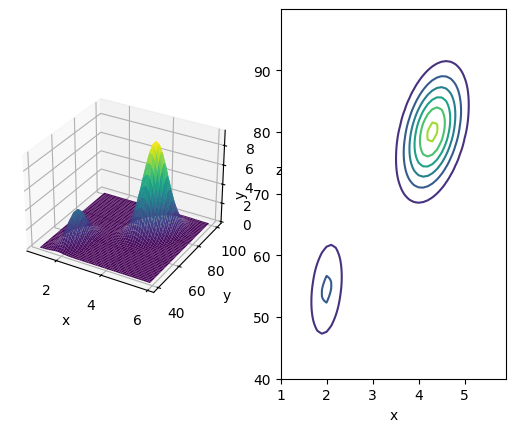

In [9]:
mus = np.array([[2.0, 54.50],
                [4.3, 80.0]])
covs = np.array([[[0.07, 0.44],
                  [0.44, 33.7]],
                 [[0.17, 0.94],
                  [0.94, 36.00 ]]])
phis = np.array([0.35, 0.65])

def multivariate_normal(x, mu, cov):
	det = np.linalg.det(cov)
	inv = np.linalg.inv(cov)
	d = len(x)
	z = np.sqrt((2 * np.pi) ** d * det)
	y = z * np.exp(-0.5 * (x - mu).T @ inv @ (x - mu))
	return y

def gmm(x, phis, mus, covs):
	K = len(phis)
	y = 0
	for k in range(K):
		phi, mu, cov = phis[k], mus[k], covs[k]
		y += phi * multivariate_normal(x, mu, cov)
	return y


xs = np.arange(1,6,0.1)
ys = np.arange(40,100,0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
	for j in range(X.shape[1]):
		x = np.array([X[i, j], Y[i, j]])
		Z[i, j] = gmm(x, phis, mus, covs)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap="viridis")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

ax2 = fig.add_subplot(1,2,2)
ax2.contour(X, Y, Z)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.show()

